In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

# DataFrame表示用の関数
from IPython.display import display

# 表示オプション設定
# Numpyの浮動小数点の表示設定 
np.set_printoptions(suppress=True, precision=4)
# Pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
# DataFrameのすべての項目を表示
pd.set_option('display.max_columns', None)
# グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14
# 乱数のシード
random_seed = 123

In [43]:
# データの読み込み
df = sns.load_dataset('titanic')

In [44]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.columns.to_list()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [47]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [48]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [49]:
# 数値のcolumnをリストにする
num_col = df.select_dtypes(include='number').columns.to_list()
num_col

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [50]:
# 非数値のcolumnをリストにする
cat_col = df.select_dtypes(exclude='number').columns.to_list()
cat_col

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [51]:
# 性別でグループ化して平均値を算出する
df.groupby(['sex'])[num_col].mean()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239


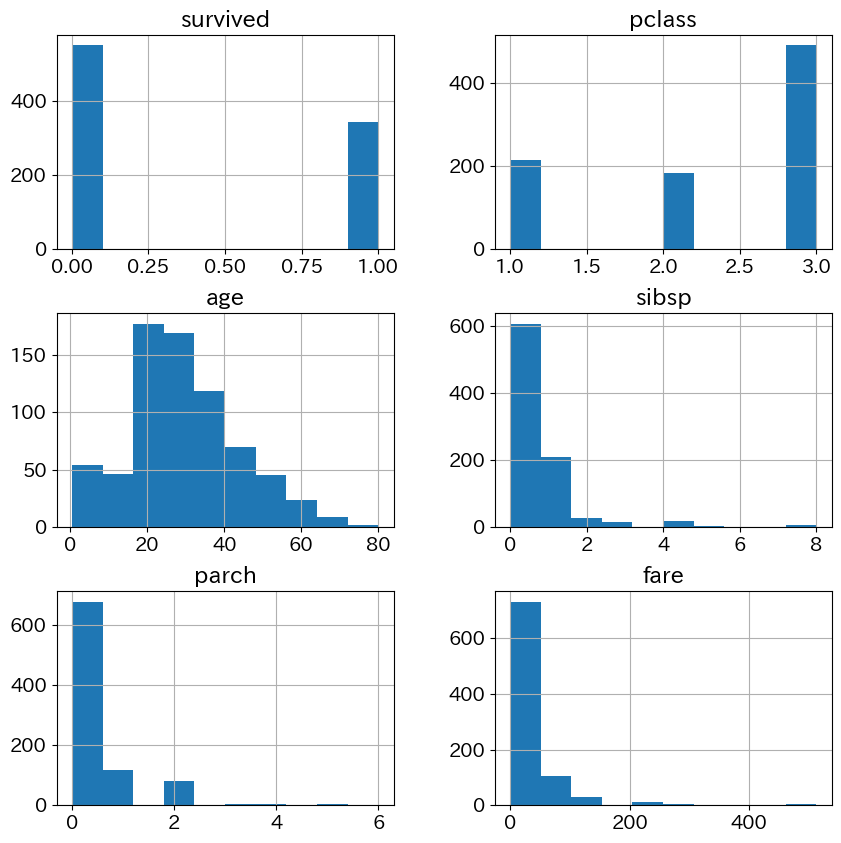

In [52]:
# 数値のデータをグラフ表示する
plt.rcParams['figure.figsize'] = (10, 10)
df[num_col].hist()
plt.show()

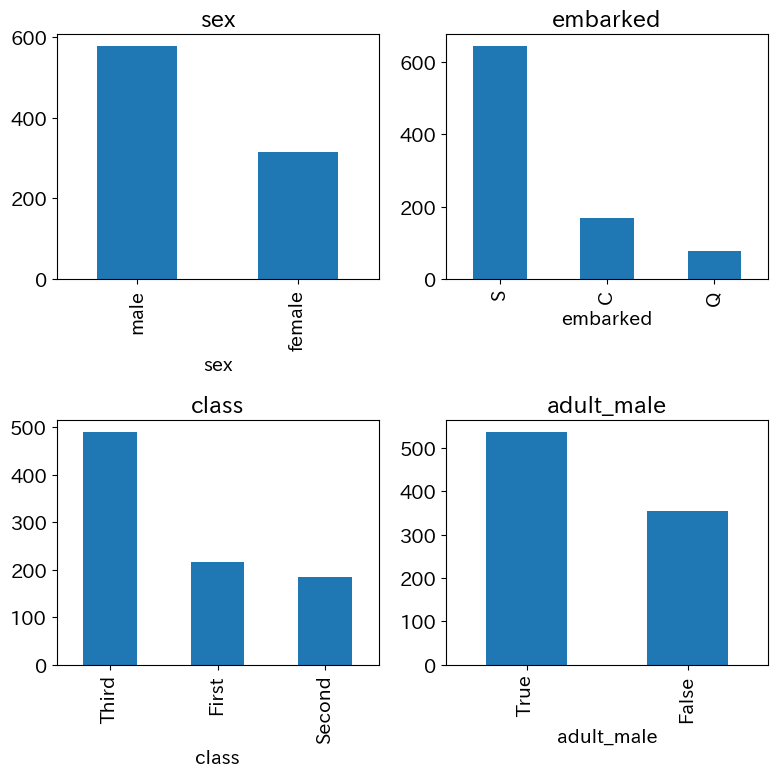

In [55]:
# カテゴリ（非数値）のsex, embarked, class, adult_maleのデータ数をグラフ表示する
plt.rcParams['figure.figsize'] = (8, 8)
for i, name in enumerate(['sex', 'embarked', 'class', 'adult_male']):
    ax = plt.subplot(2, 2, i+1)
    df[name].value_counts().plot(kind='bar', title=name, ax=ax)
plt.tight_layout()
plt.show()